In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from matplotlib import pyplot
from pandas import datetime
from pandas import concat
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
 dataset = pd.read_csv('Avocado.csv',usecols=['Date','Total Volume', 'AveragePrice', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'])

In [3]:
dataset.sort_values(by=['Date'],inplace=True)
dataset.set_index("Date", inplace = True) 
#rearranging dataset 
dataset=dataset[['AveragePrice', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region','Total Volume' ]]

In [4]:
dataset.head(20)

,AveragePrice,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Volume
Date,,,,,,,,,
2015-01-04,1.75,13598.46,13061.10,537.36,0.00,organic,2015,Southeast,27365.89
2015-01-04,1.49,905.55,905.55,0.00,0.00,organic,2015,Chicago,17723.17
2015-01-04,1.68,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton,2896.72
2015-01-04,1.52,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh,54956.80
2015-01-04,1.64,374.35,186.67,187.68,0.00,organic,2015,Boise,1505.12
2015-01-04,0.75,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico,758118.95
2015-01-04,0.85,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles,2682159.95
2015-01-04,1.50,457.12,426.67,30.45,0.00,organic,2015,LasVegas,6329.83
2015-01-04,1.00,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,435021.49


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 2015-01-04 to 2018-03-25
Data columns (total 9 columns):
AveragePrice    18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
Total Volume    18249 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.4+ MB


split data to training and testing here: 
use date before 2018 as training and 2018 dates as testing 

scaled=scaler.fit(values)
#training= scaled.transform(training_data)
#test= scaled.transform(test_data)

In [6]:
#you can split datafrane into two by filtering based on the date 
#date between 2015 and 2017 for trainng or you can get the position of the last 2017 date and split  
#rest as test 
train = dataset['2015-01-01':'2017-12-31']
test  = dataset['2018-01-01':]
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)

Train Dataset: (16953, 9)
Test Dataset: (1296, 9)


In [7]:
train.tail()

,AveragePrice,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Volume
Date,,,,,,,,,
2017-12-31,1.15,10309.11,5004.55,5304.56,0.00,organic,2017,BuffaloRochester,10568.46
2017-12-31,1.86,22469.27,20109.15,2360.12,0.00,organic,2017,Boston,25275.08
2017-12-31,1.72,1292.72,213.18,1079.54,0.00,organic,2017,Boise,2017.17
2017-12-31,0.92,1202218.65,927628.08,231172.74,43417.83,conventional,2017,GreatLakes,4398887.92
2017-12-31,1.79,9657.03,9650.37,6.66,0.00,organic,2017,Chicago,26040.03


In [8]:
test.tail()

,AveragePrice,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Volume
Date,,,,,,,,,
2018-03-25,1.36,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago,908202.13
2018-03-25,0.70,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral,9010588.32
2018-03-25,1.42,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral,163496.70
2018-03-25,1.70,89631.19,89424.11,207.08,0.00,organic,2018,California,190257.38
2018-03-25,1.34,801373.63,774634.09,23833.93,2905.61,conventional,2018,NewYork,1774776.77


In [9]:
from sklearn import preprocessing

values = dataset.values
# integer encode direction
# wnd_dir column change to categorical
encoder = preprocessing.LabelEncoder()
values[:,5] = encoder.fit_transform(values[:,5])
values[:,7] = encoder.fit_transform(values[:,7])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))

In [10]:
scaled = scaler.fit_transform(values)

In [11]:
scaled

array([[4.6619219e-01, 7.0192362e-04, 9.7583135e-04, ..., 0.0000000e+00,
        8.6792457e-01, 4.3646240e-04],
       [3.7366551e-01, 4.6742567e-05, 6.7656176e-05, ..., 0.0000000e+00,
        1.5094340e-01, 2.8219263e-04],
       [4.4128114e-01, 1.3049413e-04, 1.8887995e-04, ..., 0.0000000e+00,
        3.0188680e-01, 4.4990549e-05],
       ...,
       [3.4875447e-01, 6.6671381e-03, 8.1476001e-03, ..., 1.0000000e+00,
        8.4905660e-01, 2.6143615e-03],
       [4.4839859e-01, 4.6265712e-03, 6.6811256e-03, ..., 1.0000000e+00,
        1.1320755e-01, 3.0424942e-03],
       [3.2028472e-01, 4.1365203e-02, 5.7875082e-02, ..., 1.0000000e+00,
        5.2830189e-01, 2.8392546e-02]], dtype=float32)

In [12]:
np.shape(scaled)

(18249, 9)

In [13]:
df = pd.DataFrame(scaled)
df.head()

,0,1,2,3,4,5,6,7,8
0,0.466192,0.000702,0.000976,0.000094,0.0,1.0,0.0,0.867925,0.000436
1,0.373666,0.000047,0.000068,0.000000,0.0,1.0,0.0,0.150943,0.000282
2,0.441281,0.000130,0.000189,0.000000,0.0,1.0,0.0,0.301887,0.000045
3,0.384342,0.000770,0.000842,0.000640,0.0,0.0,0.0,0.641509,0.000878
4,0.427046,0.000019,0.000014,0.000033,0.0,1.0,0.0,0.056604,0.000023


In [14]:
n_in=1 
n_out=1 
dropnan=True

n_vars = scaled.shape[1]
cols, names = list(), list()

# input sequence (t-n, ... t-1)
for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

# forecast sequence (t, t+1, ... t+n)
for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

# put it all together
reframed = concat(cols, axis=1)
reframed.columns = names

# drop rows with NaN values
reframed.dropna(inplace=True)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15,16]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.466192   0.000702   0.000976   0.000094        0.0        1.0   
2   0.373666   0.000047   0.000068   0.000000        0.0        1.0   
3   0.441281   0.000130   0.000189   0.000000        0.0        1.0   
4   0.384342   0.000770   0.000842   0.000640        0.0        0.0   
5   0.427046   0.000019   0.000014   0.000033        0.0        1.0   

   var7(t-1)  var8(t-1)  var9(t-1)   var9(t)  
1        0.0   0.867925   0.000436  0.000282  
2        0.0   0.150943   0.000282  0.000045  
3        0.0   0.301887   0.000045  0.000878  
4        0.0   0.641509   0.000878  0.000023  
5        0.0   0.056604   0.000023  0.012127  


In [15]:
reframed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18248 entries, 1 to 18248
Data columns (total 10 columns):
var1(t-1)    18248 non-null float32
var2(t-1)    18248 non-null float32
var3(t-1)    18248 non-null float32
var4(t-1)    18248 non-null float32
var5(t-1)    18248 non-null float32
var6(t-1)    18248 non-null float32
var7(t-1)    18248 non-null float32
var8(t-1)    18248 non-null float32
var9(t-1)    18248 non-null float32
var9(t)      18248 non-null float32
dtypes: float32(10)
memory usage: 855.4 KB


In [16]:
values = reframed.values
n_train = 365*3*4
train = values[:n_train, :]
test = values[n_train:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4380, 1, 9) (4380,) (13868, 1, 9) (13868,)


In [17]:
print(train_X)

[[[4.6619219e-01 7.0192362e-04 9.7583135e-04 ... 0.0000000e+00
   8.6792457e-01 4.3646240e-04]]

 [[3.7366551e-01 4.6742567e-05 6.7656176e-05 ... 0.0000000e+00
   1.5094340e-01 2.8219263e-04]]

 [[4.4128114e-01 1.3049413e-04 1.8887995e-04 ... 0.0000000e+00
   3.0188680e-01 4.4990549e-05]]

 ...

 [[1.6370107e-01 1.2190187e-02 1.7499158e-02 ... 0.0000000e+00
   8.1132078e-01 1.0243040e-02]]

 [[2.9181492e-01 5.3515281e-03 6.2222173e-03 ... 0.0000000e+00
   6.0377359e-01 5.9765284e-03]]

 [[3.0249107e-01 2.3278904e-03 3.3694375e-03 ... 0.0000000e+00
   7.5471699e-01 5.6856973e-03]]]


In [18]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                12000     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 12,051
Trainable params: 12,051
Non-trainable params: 0
_________________________________________________________________


In [19]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Train on 4380 samples, validate on 13868 samples
Epoch 1/50
 - 1s - loss: 0.0159 - val_loss: 0.0146
Epoch 2/50
 - 0s - loss: 0.0137 - val_loss: 0.0164
Epoch 3/50
 - 0s - loss: 0.0138 - val_loss: 0.0143
Epoch 4/50
 - 0s - loss: 0.0138 - val_loss: 0.0144
Epoch 5/50
 - 0s - loss: 0.0136 - val_loss: 0.0140
Epoch 6/50
 - 0s - loss: 0.0137 - val_loss: 0.0141
Epoch 7/50
 - 0s - loss: 0.0137 - val_loss: 0.0144
Epoch 8/50
 - 0s - loss: 0.0136 - val_loss: 0.0144
Epoch 9/50
 - 0s - loss: 0.0135 - val_loss: 0.0141
Epoch 10/50
 - 0s - loss: 0.0135 - val_loss: 0.0148
Epoch 11/50
 - 0s - loss: 0.0135 - val_loss: 0.0148
Epoch 12/50
 - 0s - loss: 0.0136 - val_loss: 0.0139
Epoch 13/50
 - 0s - loss: 0.0135 - val_loss: 0.0139
Epoch 14/50
 - 0s - loss: 0.0134 - val_loss: 0.0153
Epoch 15/50
 - 0s - loss: 0.0135 - val_loss: 0.0137
Epoch 16/50
 - 0s - loss: 0.0134 - val_loss: 0.0137
Epoch 17/50
 - 0s - loss: 0.0134 - val_loss: 0.0140
Epoch 18/50
 - 0s - loss: 0.0133 - val_loss: 0.0139
Epoch 19/50
 - 0s - loss

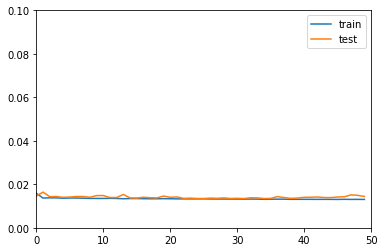

In [20]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.axis([0, 50, 0, 0.10])
pyplot.show()

In [21]:
# make a prediction
yhat = model.predict(test_X)

In [22]:
test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [23]:
from numpy import concatenate
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X1[:,1:]), axis=1)

In [24]:
inv_yhat = scaler.inverse_transform(inv_yhat)

In [25]:
inv_yhat = inv_yhat[:,0]

In [26]:
from math import sqrt
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X1[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.163
